In [11]:
import numpy as np

In [12]:
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import nn,optim

In [13]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [14]:
trainset=datasets.MNIST('home/sourav/Neuralnetwork/Mnist',download=True,train=True,transform=transform)
valset=datasets.MNIST('home/sourav/Neuralnetwork/Mnist',download=True,train=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
valloader=torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)

Extracting home/sourav/Neuralnetwork/Mnist/MNIST/raw/train-images-idx3-ubyte.gz to home/sourav/Neuralnetwork/Mnist/MNIST/raw


Extracting home/sourav/Neuralnetwork/Mnist/MNIST/raw/train-labels-idx1-ubyte.gz to home/sourav/Neuralnetwork/Mnist/MNIST/raw



Extracting home/sourav/Neuralnetwork/Mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to home/sourav/Neuralnetwork/Mnist/MNIST/raw


Extracting home/sourav/Neuralnetwork/Mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to home/sourav/Neuralnetwork/Mnist/MNIST/raw
Processing...


/opt/conda/conda-bld/pytorch_1587428190859/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [15]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)

torch.Size([64, 1, 28, 28])


In [16]:
print(labels.shape)

torch.Size([64])


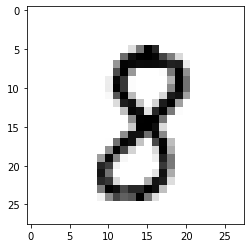

In [18]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r');

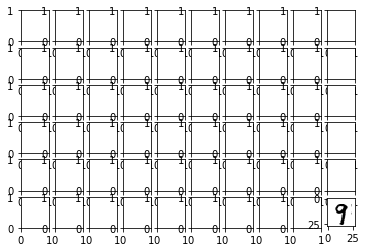

In [20]:
figure=plt.figure()
count=60
for index in range(1,count+1):
    plt.subplot(6,10,index)
    plt.axis=('off')
plt.imshow(images[index].numpy().squeeze(),cmap='gray_r');

In [23]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),nn.ReLU(),
                    nn.Linear(hidden_sizes[0],hidden_sizes[1]),nn.ReLU(),
                    nn.Linear(hidden_sizes[1],output_size),nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [24]:
criterion=nn.NLLLoss()
images.labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)#flattening
logps=model(images)# y-dash
loss=criterion(logps,labels)

In [25]:
print('Before Backpropagation:\n',model[0].weight.grad)
loss.backward()
print('After backpropagation:\n',model[0].weight.grad)

Before Backpropagation:
 None
After backpropagation:
 tensor([[ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0047, -0.0047, -0.0047,  ..., -0.0047, -0.0047, -0.0047],
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013]])


In [30]:
optimizer=optim.SGD(model.parameters(),lr=0.003,momentum=0.9)
time0=time()
epochs=15
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print("Epoch{}- Training loss: {}".format(e,running_loss/len(trainloader)))
        print ("\n training Time(in minutes)=",(time()-time0)/60)

Epoch0- Training loss: 0.6157988218515158

 training Time(in minutes)= 0.24090952475865682
Epoch1- Training loss: 0.2800303720541473

 training Time(in minutes)= 0.4769101103146871
Epoch2- Training loss: 0.2157949285347388

 training Time(in minutes)= 0.7210767110188802
Epoch3- Training loss: 0.17546343545256649

 training Time(in minutes)= 0.9507858594258626
Epoch4- Training loss: 0.1466991917939106

 training Time(in minutes)= 1.1839177131652832
Epoch5- Training loss: 0.1267211004666714

 training Time(in minutes)= 1.4213990171750386
Epoch6- Training loss: 0.11173019860027188

 training Time(in minutes)= 1.6567195375760397
Epoch7- Training loss: 0.09916935757553177

 training Time(in minutes)= 1.9013980706532796
Epoch8- Training loss: 0.08977537834520406

 training Time(in minutes)= 2.1487648844718934
Epoch9- Training loss: 0.0810955214077857

 training Time(in minutes)= 2.3924516956011455
Epoch10- Training loss: 0.07440382247216809

 training Time(in minutes)= 2.63740895986557
Epoch

In [37]:
images,labels=next(iter(valloader))
img=images[0].view(1,784)
with torch.no_grad():
    logps=model(img)
ps=torch.exp(logps)
probab=list(ps.numpy()[0])
print("Predicted Digit = ", probab.index(max(probab)))


Predicted Digit =  3


In [38]:
correct_count,all_count=0,0
for images,labels in valloader:
    for i in range(len(labels)):
        img=images[i].view(1,784)
        with torch.no_grad():
            logps=model(img)
        ps=torch.exp(logps)
        probab=list(ps.numpy()[0])
        pred_label=probab.index(max(probab))
        true_label=labels.numpy()[i]
        if(true_label==pred_label):
            correct_count+=1
        all_count+=1
print("Number of Images Tested=",all_count)
print("\nModel Accuracy=",(correct_count/all_count)*100)

Number of Images Tested= 10000

Model Accuracy= 97.43


In [39]:
torch.save(model,'home/sourav/Neuralnetwork/Mnist/Model.pt')